<a href="https://colab.research.google.com/github/rhoefl/-Joe-Hoefl-ML-Learning-HW/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [ 5.92794892 -2.03833663]


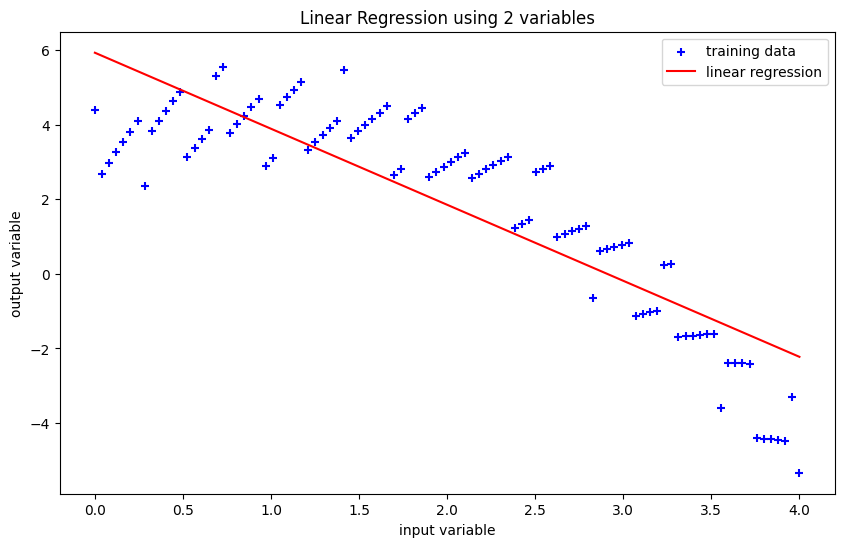

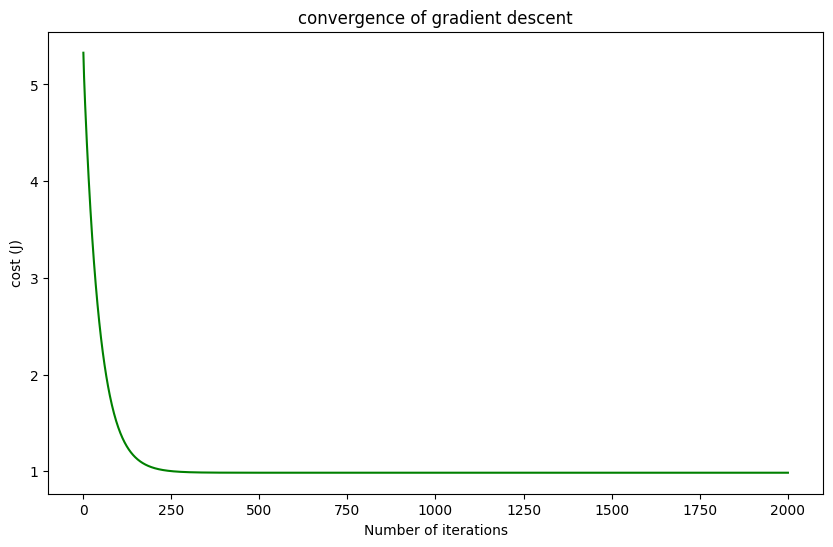

X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [0.73606043 0.55760761]


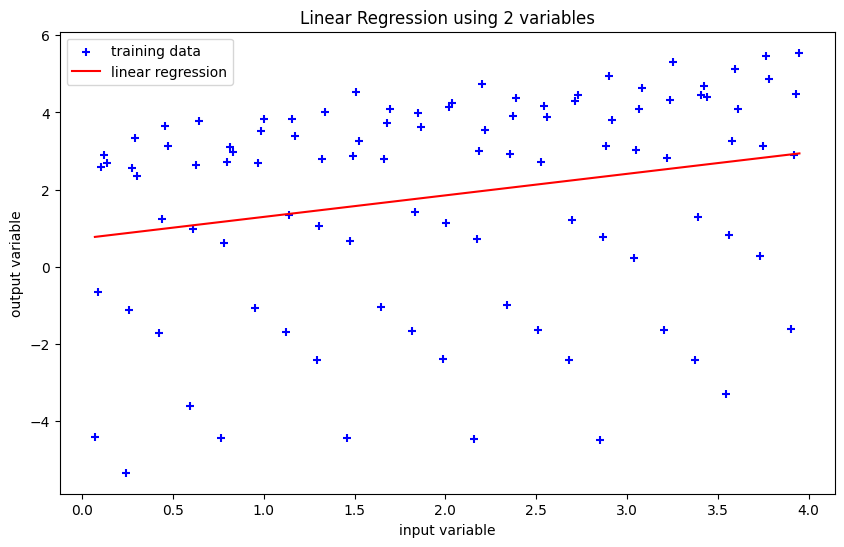

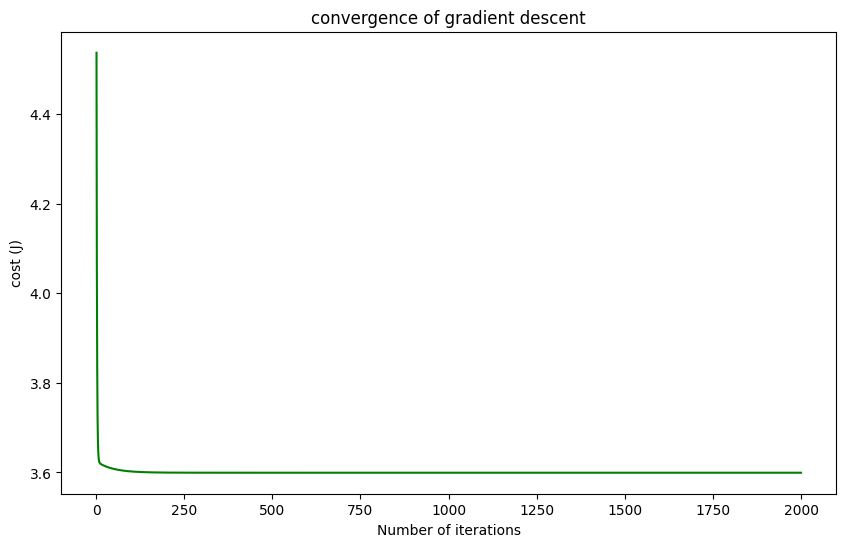

X =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [ 2.8714221  -0.52048288]


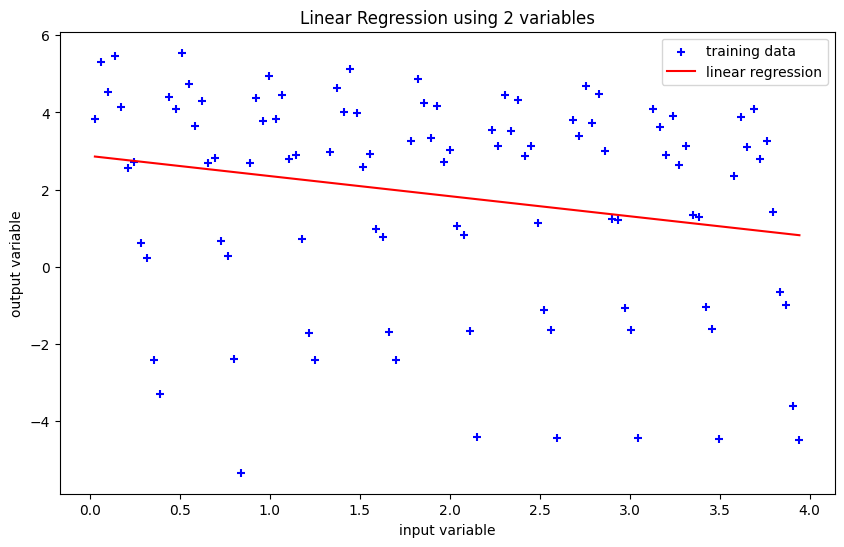

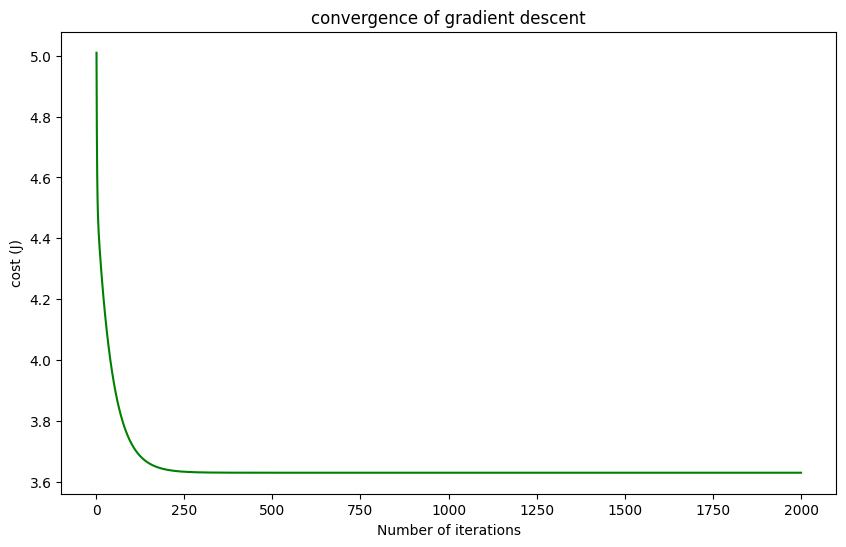

theta (x0,x1,x2,x3) = [ 5.31392989 -2.00368575  0.53260255 -0.26556708]
3.5772796020480597
0.24429005364325773
0.10251065033649731


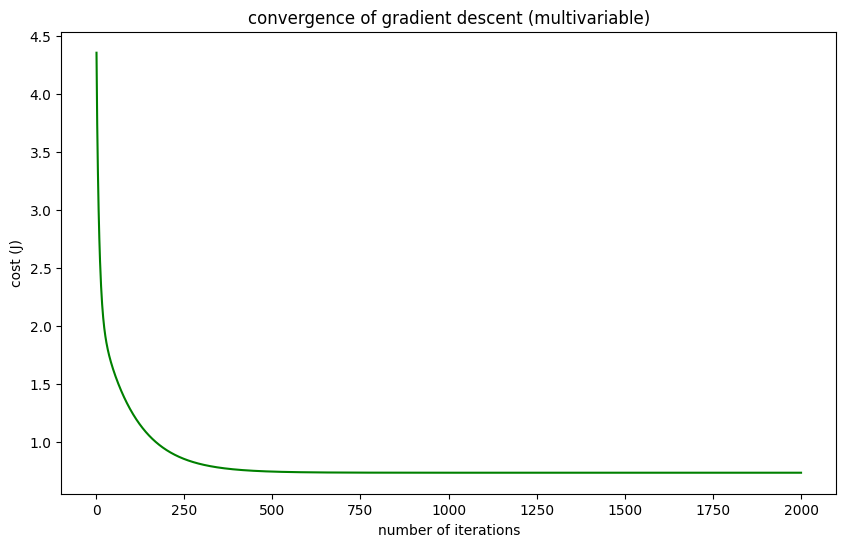

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



#Intro to Machine Learning
#Assignment 1: D3 Data
#Joe Hoefl
#Student ID: 801317117



file_path = '/content/D3.csv'
df = pd.read_csv(file_path)
df = df.iloc[:, :4]
df.columns = ['x1','x2','x3','y']
M = len(df); M

def get_xy(df, x_col_index, y_col_index=3):
  X_list = df.values[:, x_col_index]
  y = df.values[:, y_col_index]
  m = len(y)
  n = len(X_list)
  return X_list, y, m, n

def make_design_univariate(X_list, m):
  X_0 = np.ones((m, 1))
  X_1 = X_list.reshape(m, 1)
  X = np.hstack((X_0, X_1))
  return X

def compute_cost(X, y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  m = len(y)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

def gradient_descent(X, y, theta, alpha, iterations):
  cost_history = np.zeros(iterations)
  m = len(y)
  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors)
    theta = theta - sum_delta
    cost_history[i] = compute_cost(X, y, theta)
  return theta, cost_history

iterations = 2000
alpha = 0.05


# Part 1:  (x1, x2, x3)

for x_col in [0, 1, 2]:
  X_list, y, m, n = get_xy(df, x_col, y_col_index=3)

  print('X = ', X_list[:5])
  print('y = ', y[:5])
  print('m = ', m)
  print('n = ', n)

  X = make_design_univariate(X_list, m)
  theta = np.zeros(2)

  cost0 = compute_cost(X, y, theta)
  print('The cost for given values of theta_0 and theta_1 =', cost0)

  theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
  print('Final value of theta =', theta)

  order = np.argsort(X[:, 1])
  xs = X[:, 1][order]
  ys = theta[0] + theta[1]*xs
  plt.scatter(X[:, 1], y, color='b', marker='+', label='training data')
  plt.plot(xs, ys, color='r', label='linear regression')
  plt.rcParams["figure.figsize"] = (10, 6)
  plt.xlabel('input variable')
  plt.ylabel('output variable')
  plt.title('Linear Regression using 2 variables')
  plt.legend()
  plt.show()

  # --- loss plot ---
  plt.plot(range(1, iterations + 1), cost_history, color='green')
  plt.rcParams["figure.figsize"] = (10, 6)
  plt.xlabel('Number of iterations')
  plt.ylabel('cost (J)')
  plt.title('convergence of gradient descent')
  plt.show()


# Part 2: Multivariable (x1, x2, x3)

X_all = df.values[:, :3]
y = df.values[:, 3]
m = len(y)
X0 = np.ones((m, 1))
X_multi = np.hstack((X0, X_all))
theta_m = np.zeros(4)

theta_m, cost_history_m = gradient_descent(X_multi, y, theta_m, alpha, iterations)
print('theta (x0,x1,x2,x3) =', theta_m)

pred1 = np.array([1, 1, 1, 1]).dot(theta_m)
pred2 = np.array([1, 2, 0, 4]).dot(theta_m)
pred3 = np.array([1, 3, 2, 1]).dot(theta_m)
print(pred1)
print(pred2)
print(pred3)

plt.plot(range(1, iterations + 1), cost_history_m, color='green')
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlabel('number of iterations')
plt.ylabel('cost (J)')
plt.title('convergence of gradient descent (multivariable)')
plt.show()






